In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfVIB = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VIB Historical Data.csv')
dfSNV = pd.read_csv('/content/drive/MyDrive/Final project PTTK/SVN Historical Data.csv')
dfVNM = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VNM ETF Stock Price History.csv')

dfSNV = dfSNV[::-1]
dfVNM = dfVNM[::-1]

dfVIB['Date'] = pd.to_datetime(dfVIB['Date'])
dfSNV['Date'] = pd.to_datetime(dfSNV['Date'])
dfVNM['Date'] = pd.to_datetime(dfVNM['Date'])

dfVIB = dfVIB.dropna()
dfSNV = dfSNV.dropna()
dfVNM = dfVNM.dropna()

dfVIB[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']] = dfVIB[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']].astype(float)

dfVIB['Date'] = pd.to_datetime(dfVIB['Date'])
dfVIB.set_index('Date', inplace=True)

dfSNV['Date'] = pd.to_datetime(dfSNV['Date'])
dfSNV.set_index('Date', inplace=True)

dfVNM['Date'] = pd.to_datetime(dfVNM['Date'])
dfVNM.set_index('Date', inplace=True)

In [ ]:
train_size = int(len(dfVIB) * 0.8)
train, test = dfVIB[0:train_size], dfVIB[train_size:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

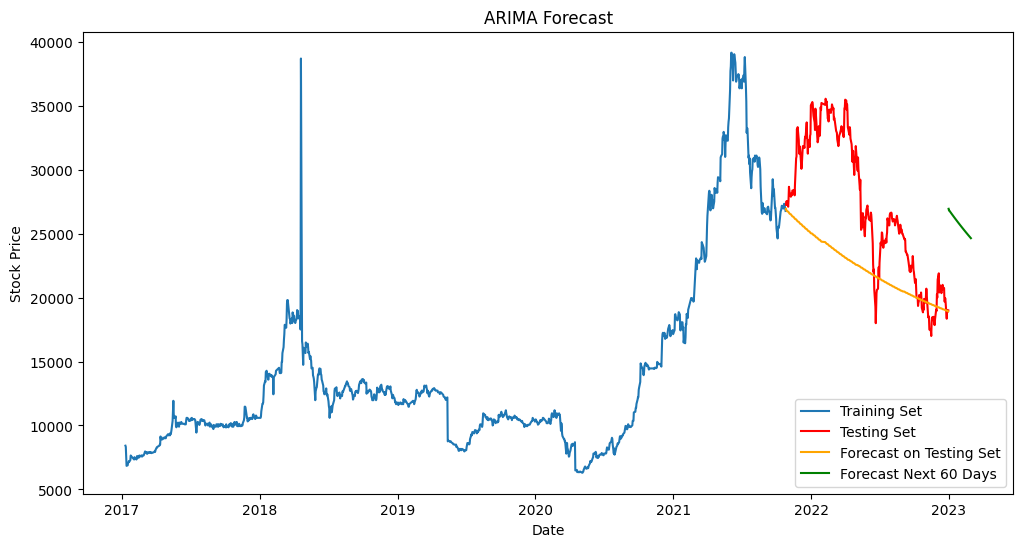

In [ ]:
last_index = dfVIB.index[-1]

# Generate the next 60 days
next_60days = pd.date_range(start=last_index + pd.Timedelta(days=1), periods=60, freq='D')
next_60days_array = next_60days.to_numpy().reshape(-1, 1)
next_60days_array_flat = next_60days_array.flatten()
order = (2, 0, 0)

# ARIMA modeling on the training set
model = ARIMA(train['Price'], order=order)
results = model.fit()

# Forecast on the testing set
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Forecast for the next 60 days
forecast_60days = results.get_forecast(steps=60)

# Get confidence intervals
forecast_ci = forecast.conf_int()
forecast_60days_ci = forecast_60days.conf_int()

# Plot the original data, training set, and the forecast on the testing set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Set')
plt.plot(test.index, test['Price'], label='Testing Set', color='red')
plt.plot(test.index, forecast.predicted_mean, color='orange', label='Forecast on Testing Set')
plt.plot(next_60days, forecast_60days.predicted_mean, color='green', label='Forecast Next 60 Days')
plt.title('VIB Stock Price Overtime')
plt.xlabel('Date')
plt.ylabel('VIB Stock Price Overtime')
plt.legend()
plt.show()


In [ ]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Price'], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(test['Price'], forecast.predicted_mean)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((test['Price'] - forecast.predicted_mean) / test['Price'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Root Mean Squared Error (RMSE): 6025.8712126165965
Mean Absolute Error (MAE): 4853.720334851037
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-67-b4674531a32c>:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Price'] - forecast.predicted_mean) / test['Price'])) * 100


### SNV

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

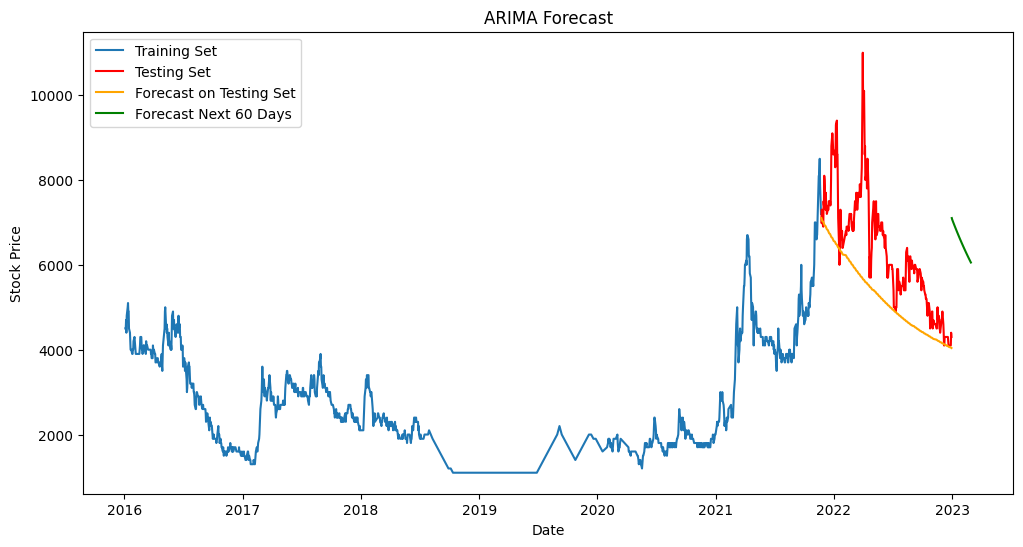

In [ ]:
train_size = int(len(dfSNV) * 0.8)
train, test = dfSNV[0:train_size], dfSNV[train_size:]

last_index = dfVIB.index[-1]

# Generate the next 60 days
next_60days = pd.date_range(start=last_index + pd.Timedelta(days=1), periods=60, freq='D')
next_60days_array = next_60days.to_numpy().reshape(-1, 1)
next_60days_array_flat = next_60days_array.flatten()
order = (2, 0, 0)

# ARIMA modeling on the training set
model = ARIMA(train['Price'], order=order)
results = model.fit()

# Forecast on the testing set
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Forecast for the next 60 days
forecast_60days = results.get_forecast(steps=60)

# Get confidence intervals
forecast_ci = forecast.conf_int()
forecast_60days_ci = forecast_60days.conf_int()

# Plot the original data, training set, and the forecast on the testing set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Set')
plt.plot(test.index, test['Price'], label='Testing Set', color='red')
plt.plot(test.index, forecast.predicted_mean, color='orange', label='Forecast on Testing Set')
plt.plot(next_60days, forecast_60days.predicted_mean, color='green', label='Forecast Next 60 Days')
plt.title('SNV Stock Price Overtime')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Price'], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(test['Price'], forecast.predicted_mean)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((test['Price'] - forecast.predicted_mean) / test['Price'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Root Mean Squared Error (RMSE): 1377.125958532931
Mean Absolute Error (MAE): 1102.583538541012
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-69-b4674531a32c>:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Price'] - forecast.predicted_mean) / test['Price'])) * 100


### VNM

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

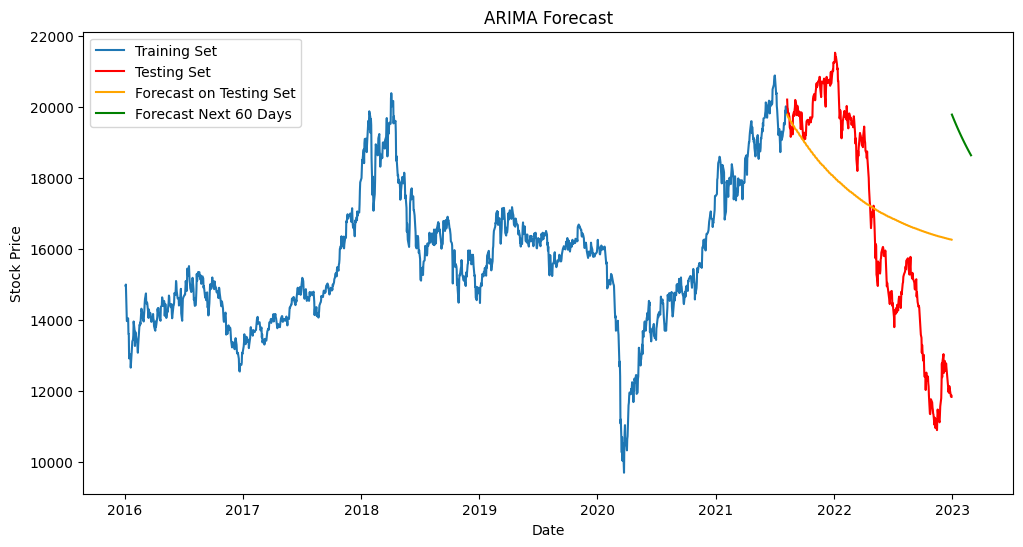

In [ ]:
train_size = int(len(dfVNM) * 0.8)
train, test = dfVNM[0:train_size], dfVNM[train_size:]

last_index = dfVIB.index[-1]

# Generate the next 60 days
next_60days = pd.date_range(start=last_index + pd.Timedelta(days=1), periods=60, freq='D')
next_60days_array = next_60days.to_numpy().reshape(-1, 1)
next_60days_array_flat = next_60days_array.flatten()
order = (1, 0, 0)

# ARIMA modeling on the training set
model = ARIMA(train['Price'], order=order)
results = model.fit()

# Forecast on the testing set
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Forecast for the next 60 days
forecast_60days = results.get_forecast(steps=60)

# Get confidence intervals
forecast_ci = forecast.conf_int()
forecast_60days_ci = forecast_60days.conf_int()

# Plot the original data, training set, and the forecast on the testing set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Set')
plt.plot(test.index, test['Price'], label='Testing Set', color='red')
plt.plot(test.index, forecast.predicted_mean, color='orange', label='Forecast on Testing Set')
plt.plot(next_60days, forecast_60days.predicted_mean, color='green', label='Forecast Next 60 Days')
plt.title('VNM Stock Price Overtime')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Price'], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(test['Price'], forecast.predicted_mean)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((test['Price'] - forecast.predicted_mean) / test['Price'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Root Mean Squared Error (RMSE): 2485.6334464176134
Mean Absolute Error (MAE): 2087.425778998763
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-71-b4674531a32c>:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Price'] - forecast.predicted_mean) / test['Price'])) * 100
